In [1]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [13]:
# the beginning of processing all our files by filename
all_files = glob('*.csv')
print(f"Total number of files: {len(all_files)}")

accuweather_df = pd.DataFrame()
accuweather_meteo_df = pd.DataFrame()

for filename in all_files:
  curr_filename = filename.replace(' ', '_').replace('. ', '_')

  with open(filename, 'r', encoding='utf-8', errors='ignore') as file:
    if 'meteo_data' in filename:
      accuweather_meteo_df = pd.read_csv(file)
    elif 'accuweather' in filename:
      accuweather_df = pd.read_csv(file)
    else:
      print(f'File {filename} is not being processed')

print(accuweather_meteo_df.shape)
print(accuweather_df.shape)

Total number of files: 2
(19445, 26)
(3014, 15)


In [14]:
# ---------------------------------------------------------------
# Validate Accuweather meets our 5% margin of error for accuracy
# ---------------------------------------------------------------

# Column cleaning. Strip white spaces
accuweather_df.columns = accuweather_df.columns.str.strip()
accuweather_meteo_df.columns = accuweather_meteo_df.columns.str.strip()

#
# Dates
#
# Set date column to proper datetime format
accuweather_df['Date & Time'] = pd.to_datetime(accuweather_df['Date & Time'], format='mixed', infer_datetime_format=True)
accuweather_meteo_df['Date & Time'] = pd.to_datetime(accuweather_meteo_df['Date & Time'], format='mixed', infer_datetime_format=True)

# standardize to the format: 'Year-Month-Day Hour:Minute:Second'
accuweather_df['Date & Time'] = accuweather_df['Date & Time'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
accuweather_meteo_df['Date & Time'] = accuweather_meteo_df['Date & Time'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

accuweather_df.set_index('Date & Time', inplace=True)
accuweather_meteo_df.set_index('Date & Time', inplace=True)

accuweather_df.sort_index(inplace=True)
accuweather_meteo_df.sort_index(inplace=True)

# update the index to be datetime
accuweather_df.index = pd.to_datetime(accuweather_df.index)
accuweather_meteo_df.index = pd.to_datetime(accuweather_meteo_df.index)

In [15]:
accuweather_df.head()

,Temperature,Humidity (%),IndoorRelativeHumidity (%),DewPoint,Wind Speed (km/h),WindGust (km/h),UVIndex,Visibility (km),CloudCover (%),Ceiling (m),Pressure (mb),ApparentTemperature,WindChill,WetBulb
Date & Time,,,,,,,,,,,,,,
2023-01-29 16:37:00,8.0,48,36,-2.5,14.8,28.8,1,16.1,13,10150,1018.0,8.3,5.0,3.7
2023-01-29 16:57:00,8.0,48,36,-2.5,14.8,28.8,1,16.1,13,10150,1018.0,8.3,5.0,3.7
2023-01-29 17:37:00,7.1,49,36,-2.9,11.1,26.9,0,16.1,13,10180,1019.0,7.8,5.0,3.0
2023-01-29 18:47:00,6.2,52,36,-2.9,11.1,24.1,0,16.1,13,10150,1019.0,6.7,3.9,2.5
2023-01-29 19:47:00,5.9,53,36,-3.0,18.5,18.5,0,16.1,11,10180,1019.0,6.7,2.8,2.3


In [16]:
accuweather_meteo_df.head()

,Barometer - hPa,Temp - C,High Temp - C,Low Temp - C,Hum - %,Dew Point - C,Wet Bulb - C,Wind Speed - km/h,Wind Run - km,High Wind Speed - km/h,...,Rain Rate - mm/h,Solar Rad - W/m^2,Solar Energy - Ly,High Solar Rad - W/m^2,ET - mm,UV Index,UV Dose - MEDs,High UV Index,Heating Degree Days,Cooling Degree Days
Date & Time,,,,,,,,,,,,,,,,,,,,,
2023-01-30 00:00:00,1018.9,7.7,7.8,7.7,37,-6.1,0.4,8.0,0.67,24.1,...,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.037,0.0
2023-01-30 00:05:00,1019.0,7.7,7.7,7.6,36,-6.5,0.1,8.0,0.67,22.5,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.037,0.0
2023-01-30 00:10:00,1018.9,7.6,7.7,7.6,36,-6.5,0.1,4.8,0.40,16.1,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.037,0.0
2023-01-30 00:15:00,1018.9,7.6,7.6,7.5,36,-6.6,0.1,4.8,0.40,16.1,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.037,0.0
2023-01-30 00:20:00,1019.2,7.4,7.5,7.4,36,-6.7,0.0,6.4,0.54,24.1,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.038,0.0


Text(0.5, 1.0, 'At a Glance: Accuweather vs Weather Station Accuracy')

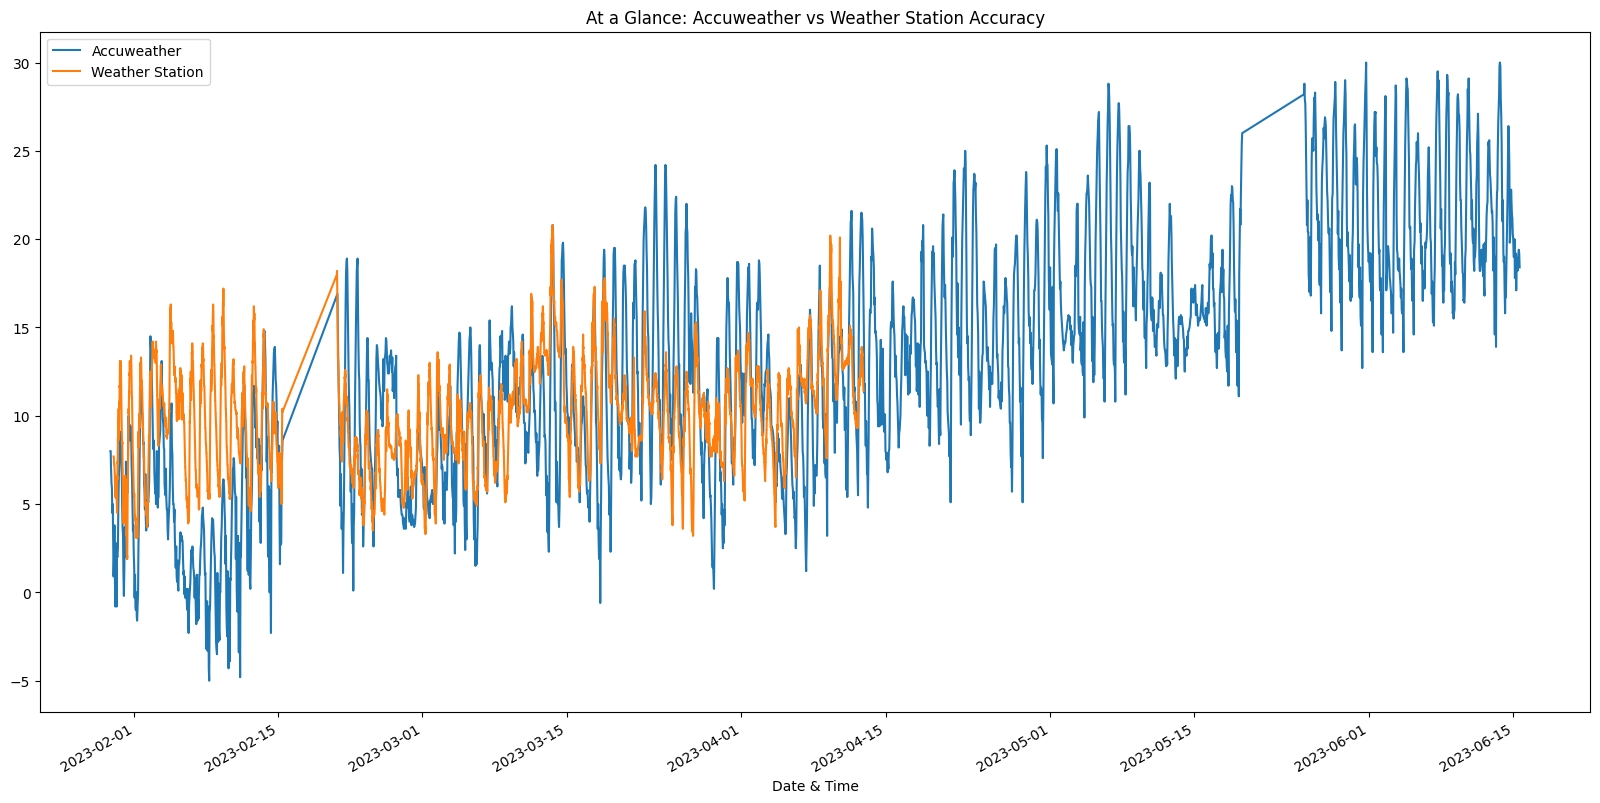

In [17]:
# plot raw data
plt.figure()
accuweather_df['Temperature'].plot(figsize=(20,10), label='Accuweather')
accuweather_meteo_df[:"2023-06-15 14:42:00"]['Temp - C'].plot(figsize=(20,10), label='Weather Station')
plt.legend()
plt.title('At a Glance: Accuweather vs Weather Station Accuracy')

In [18]:
#
# Understand the Alignment of our Data Sources
#
accuweather_comp_columns = ['Temperature', 'Humidity (%)', 'DewPoint', 'Wind Speed (km/h)', 'WindGust  (km/h)', 'UVIndex', 'WetBulb', 'Pressure (mb)']
accuweather_meteo_comp_columns = ['Temp - C', 'Hum - %', 'Dew Point - C', 'Wind Speed - km/h', 'High Wind Speed - km/h', 'UV Index', 'Wet Bulb - C', 'Barometer - hPa']

# Use zip() to create pairs and dict() to convert these pairs to a dictionary
comp_dict =  dict(zip(accuweather_comp_columns, accuweather_meteo_comp_columns))

#resampling will gill up those slots for every hour
accuweather_comp_hourly = accuweather_df[accuweather_comp_columns].resample('H').mean()
accuweather_meteo_comp_hourly = accuweather_meteo_df[accuweather_meteo_comp_columns].resample('H').mean()

# Replace all irregular values and NaN to smooth out dataset
accuweather_comp_hourly.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
accuweather_meteo_comp_hourly.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)

# scaling our pressure data to normalize comparison
scaler = MinMaxScaler()
accuweather_comp_hourly['Pressure (mb)'] = scaler.fit_transform(accuweather_comp_hourly[['Pressure (mb)']])
accuweather_meteo_comp_hourly['Barometer - hPa'] = scaler.fit_transform(accuweather_meteo_comp_hourly[['Barometer - hPa']])

In [19]:
# drop the last row of accuweather_comp_hourly to ensure size equality for calculation
accuweather_greater_row_num = accuweather_comp_hourly.shape[0] - accuweather_meteo_comp_hourly.shape[0]
accuweather_comp_hourly.drop(accuweather_comp_hourly.tail(accuweather_greater_row_num).index, inplace=True)

# ensure size equality for calculation
assert accuweather_comp_hourly.shape[0] == accuweather_meteo_comp_hourly.shape[0]

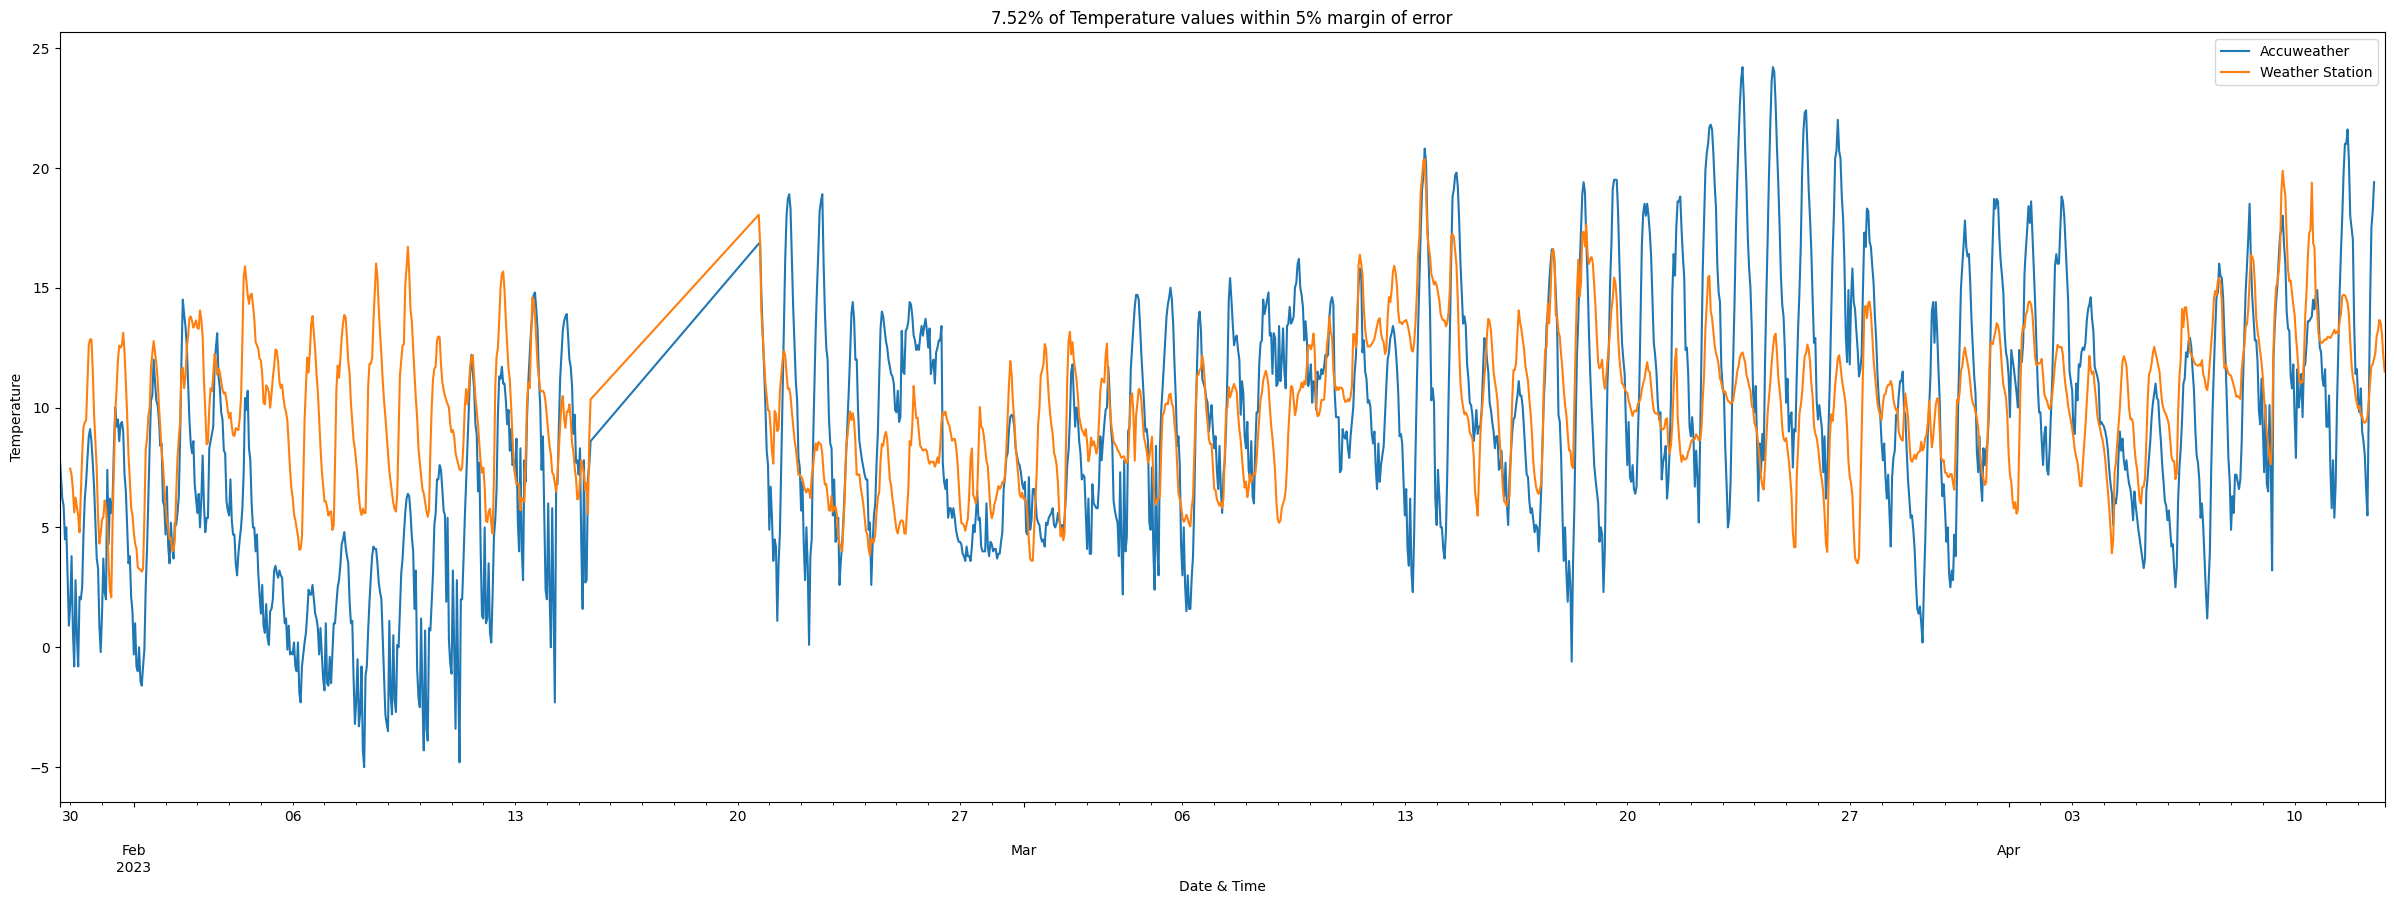

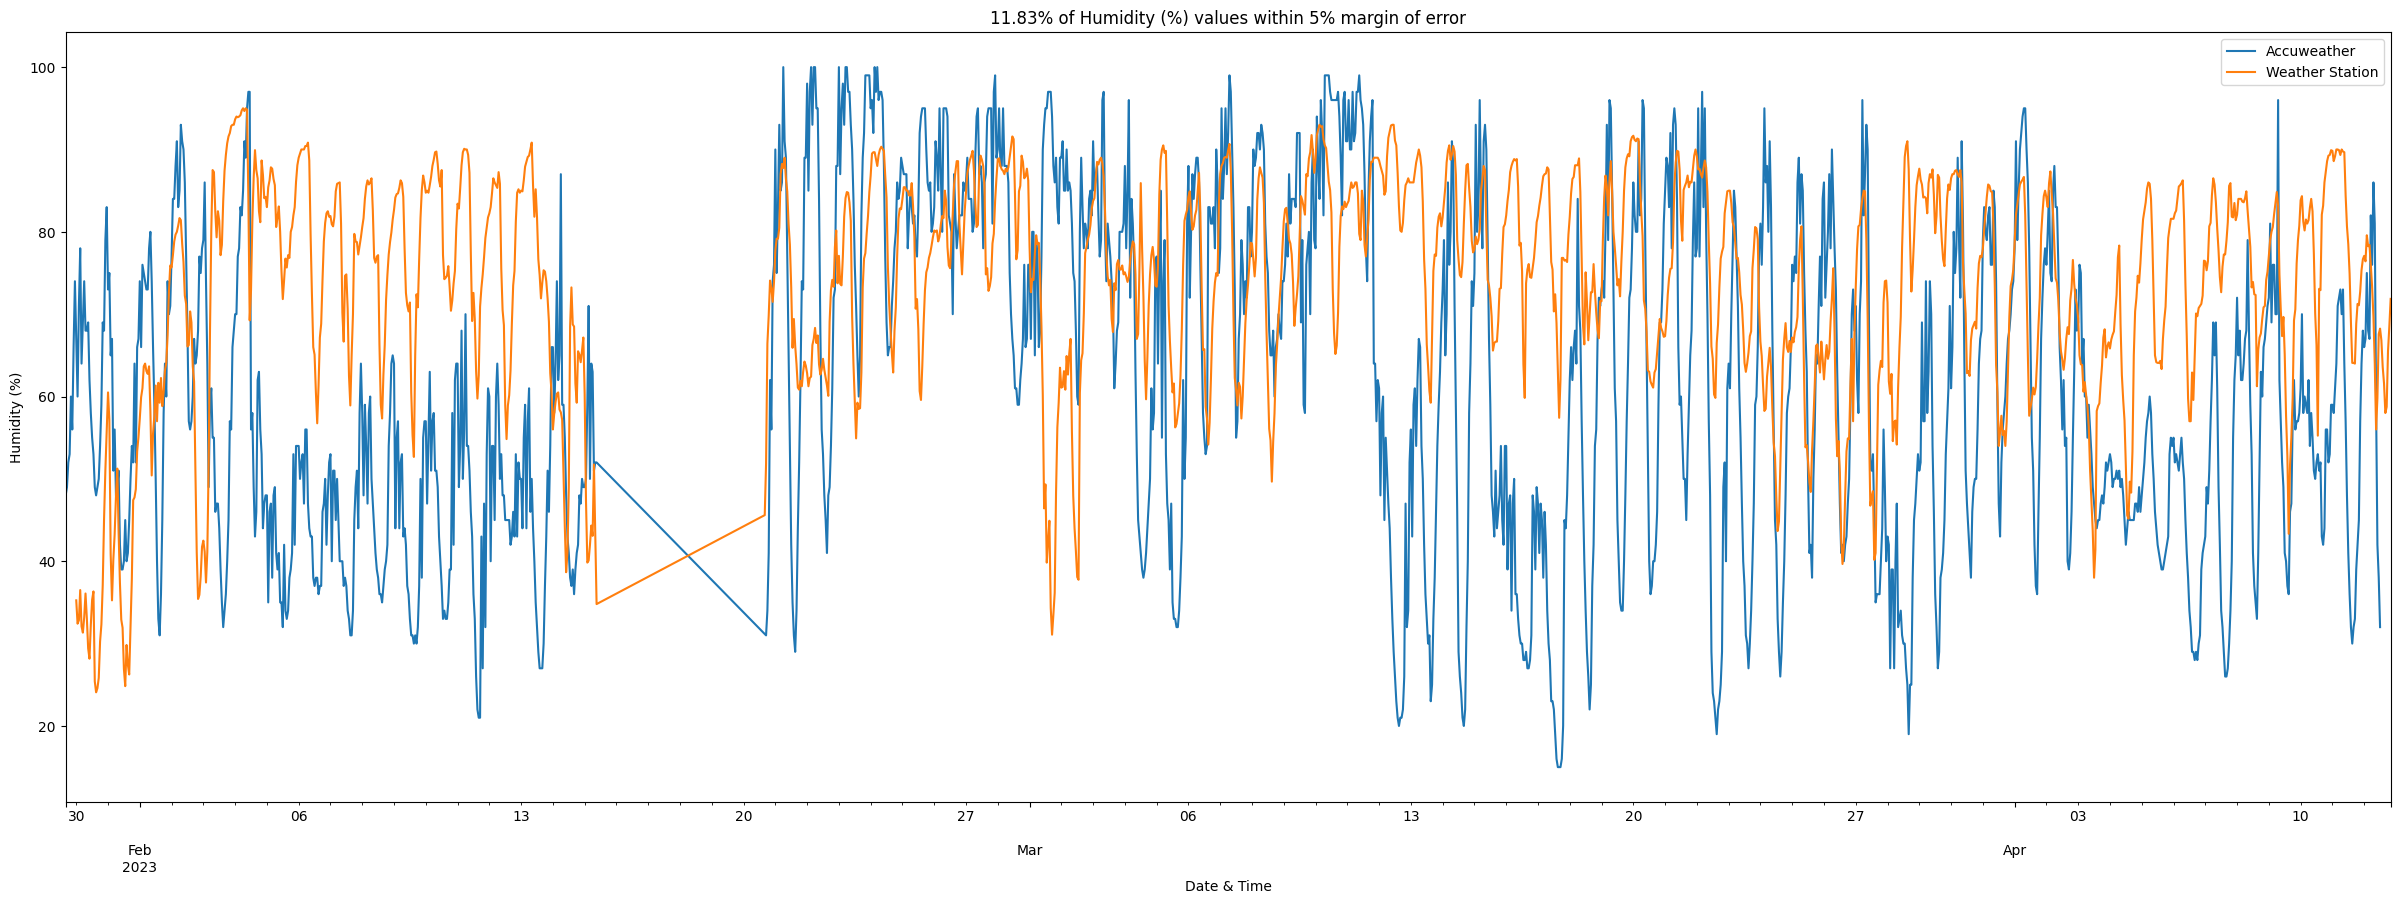

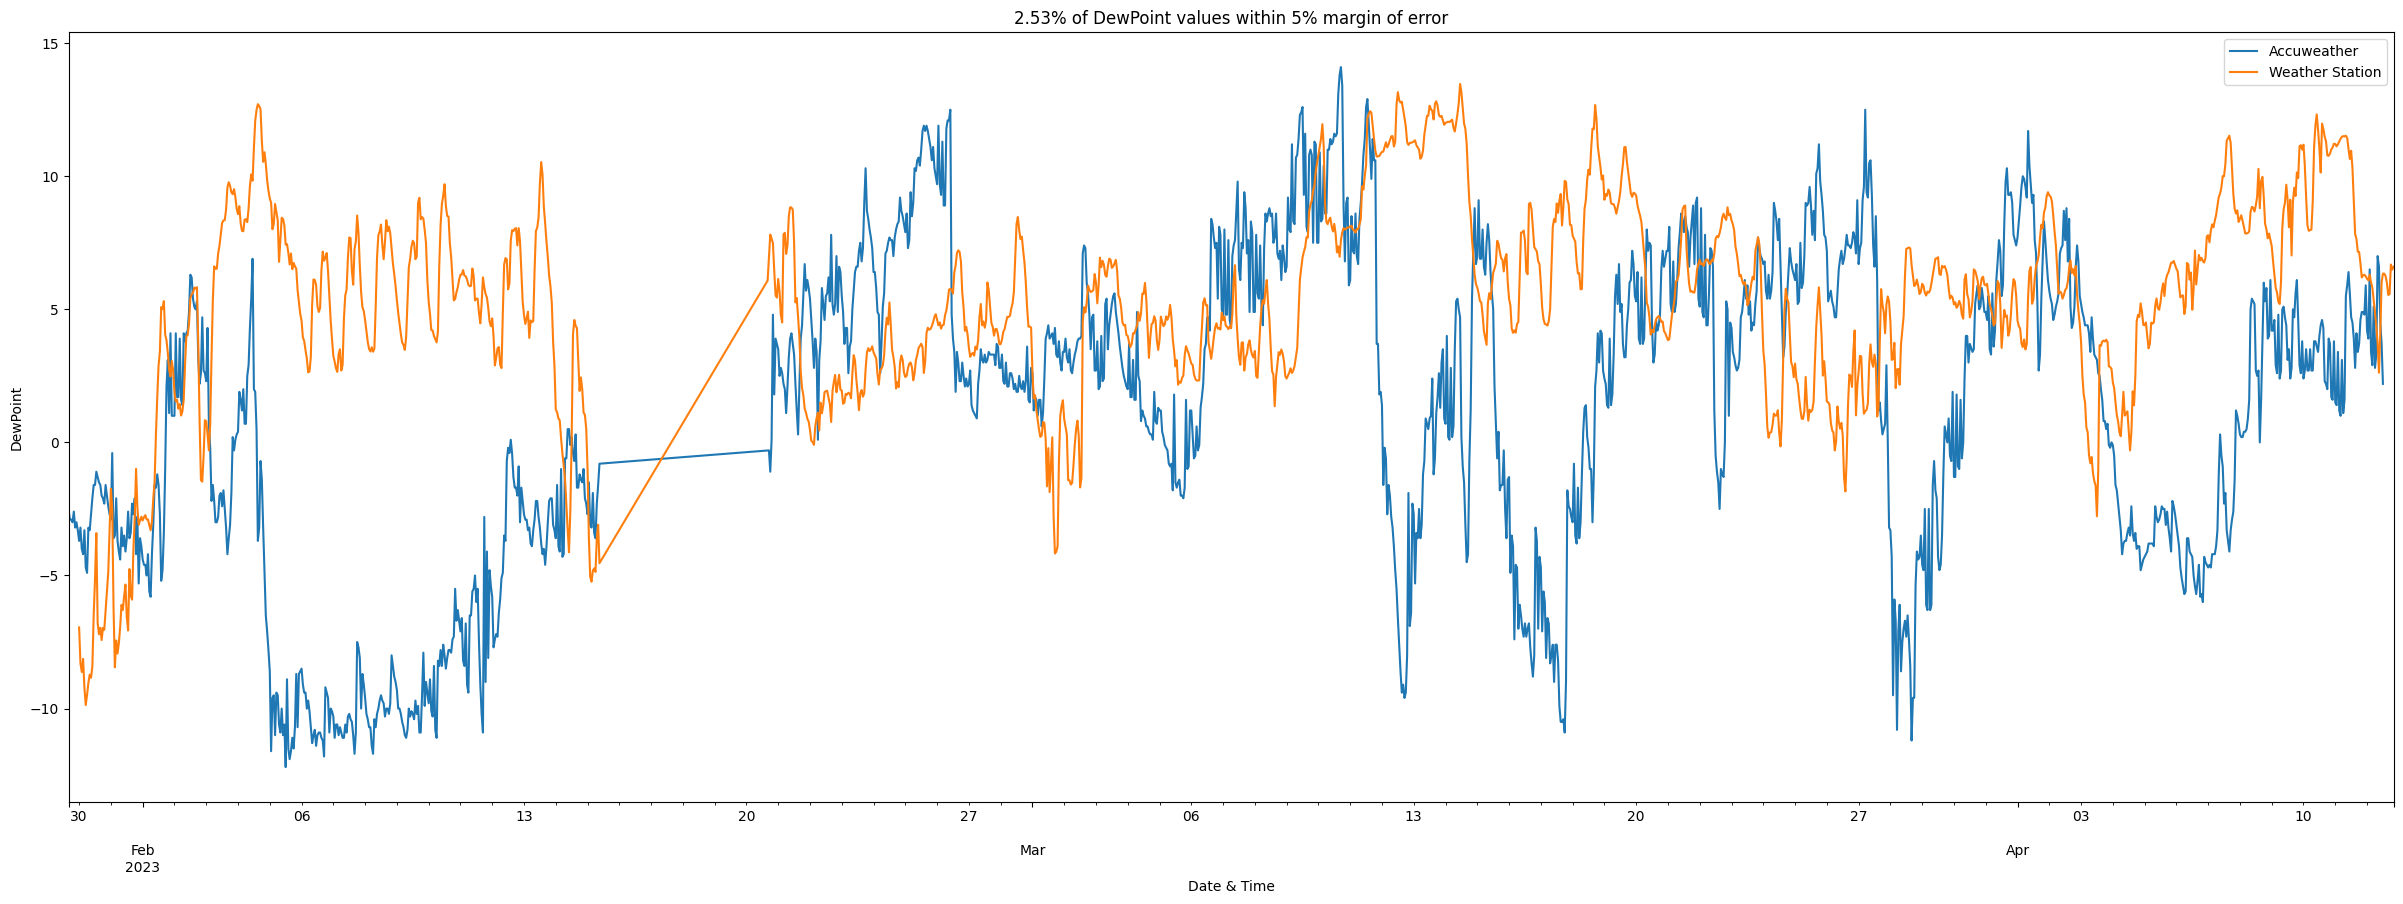

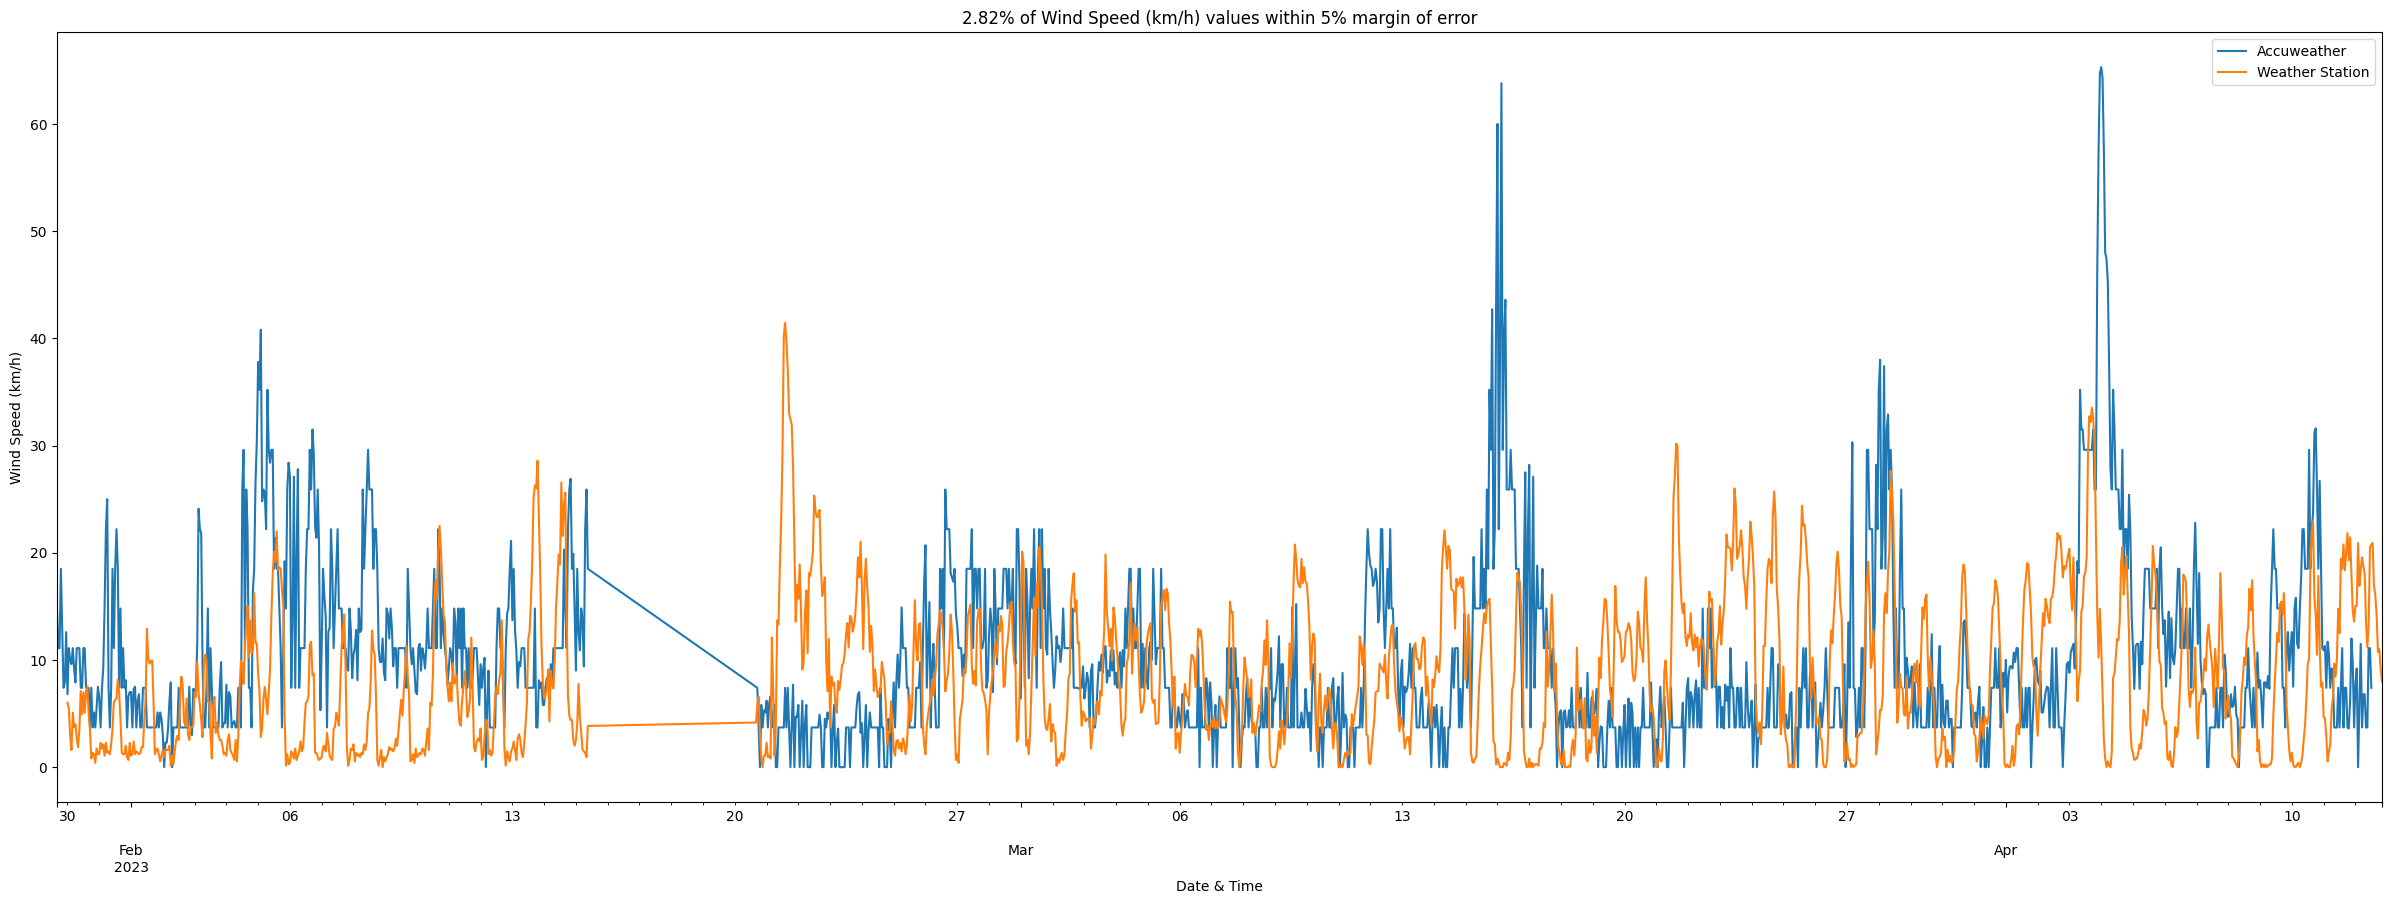

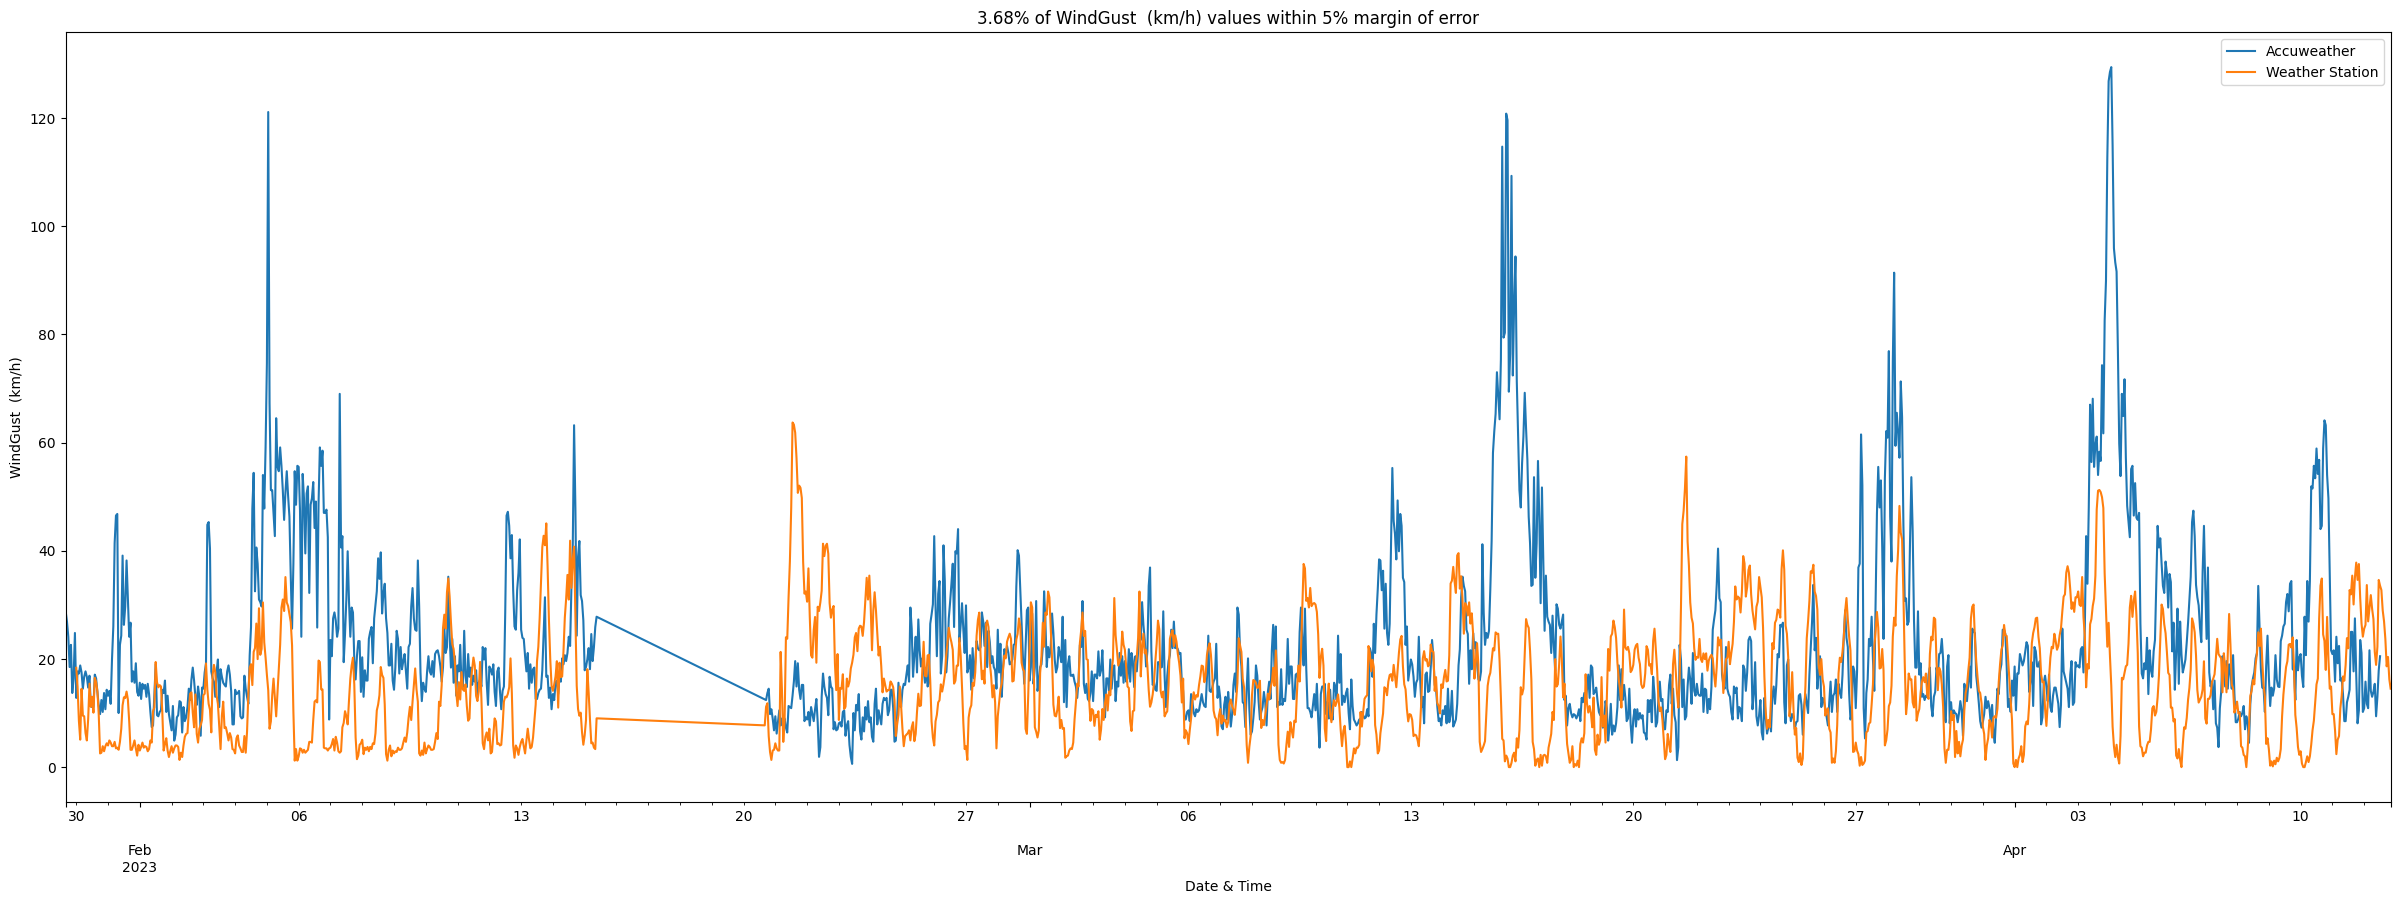

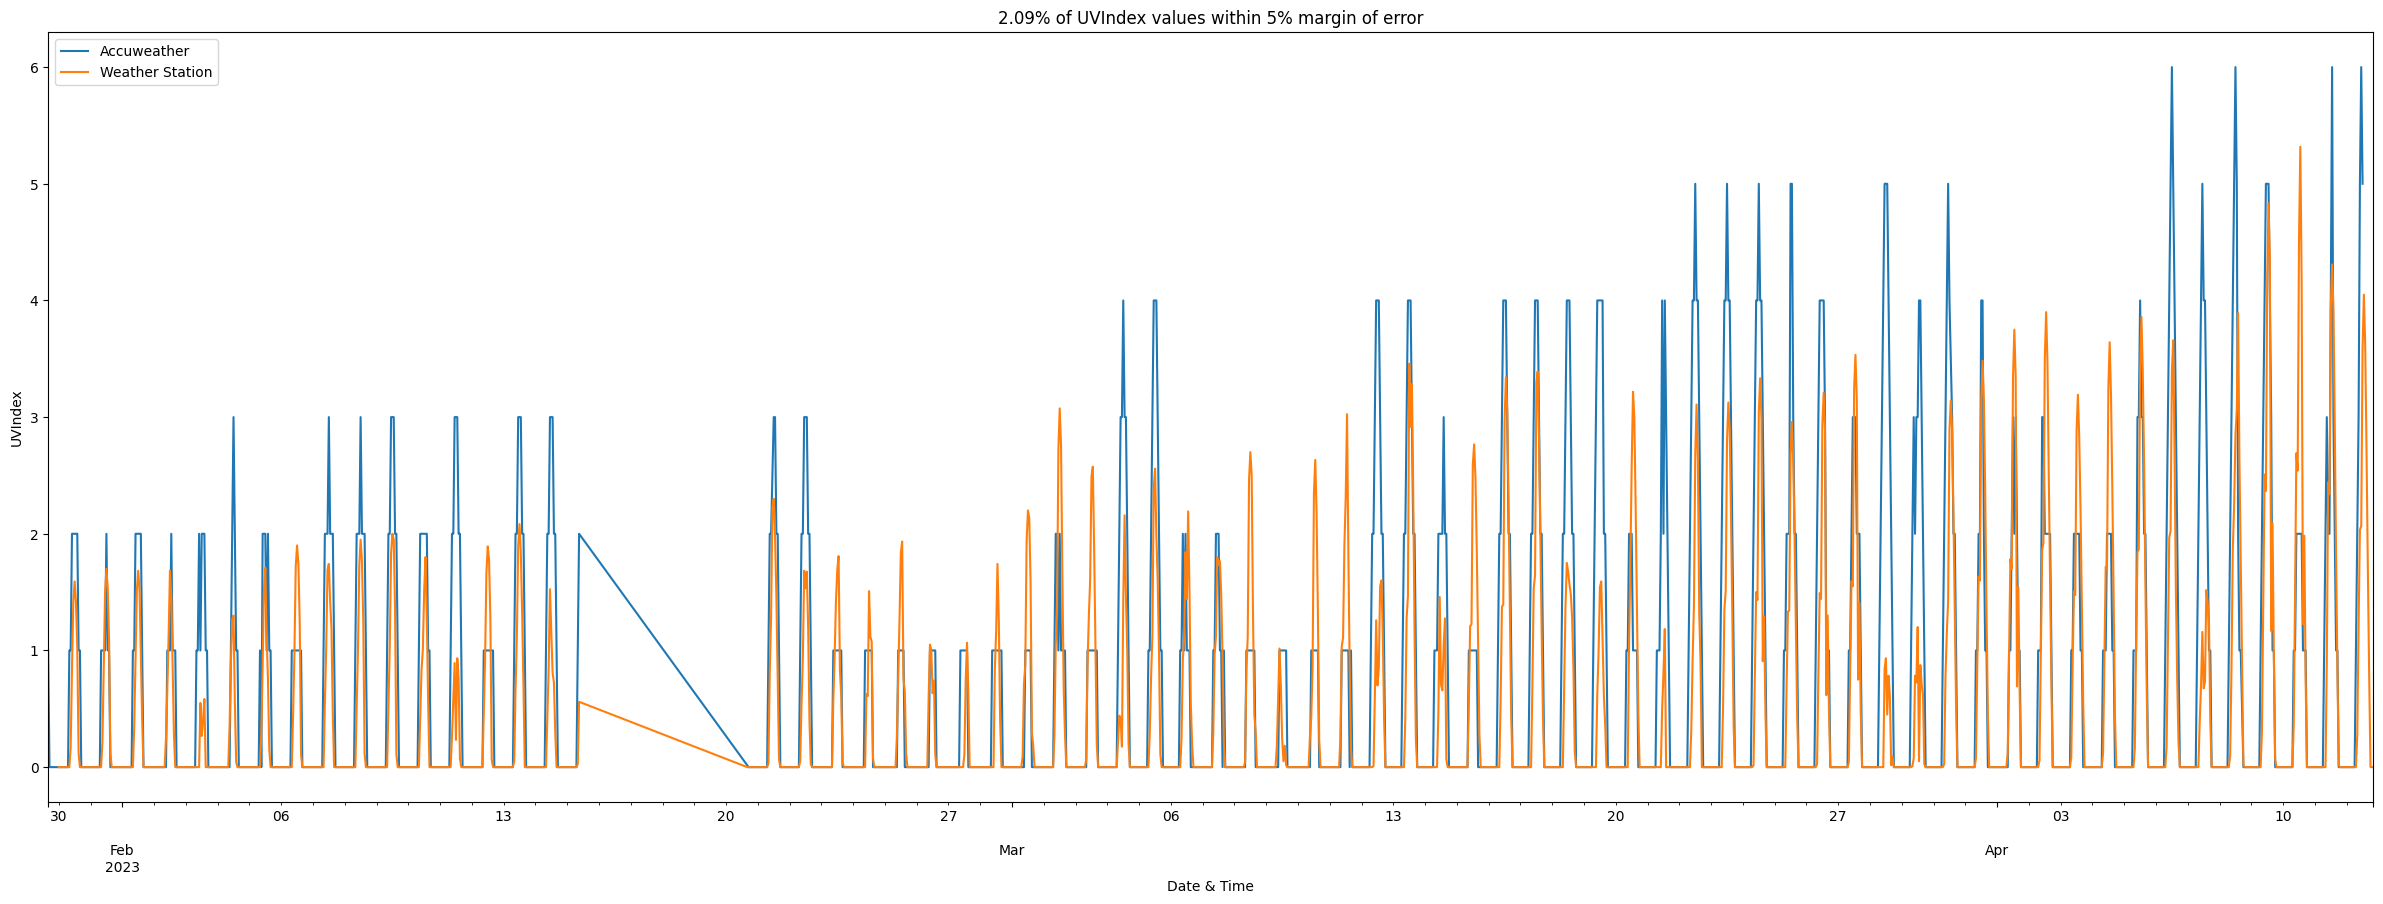

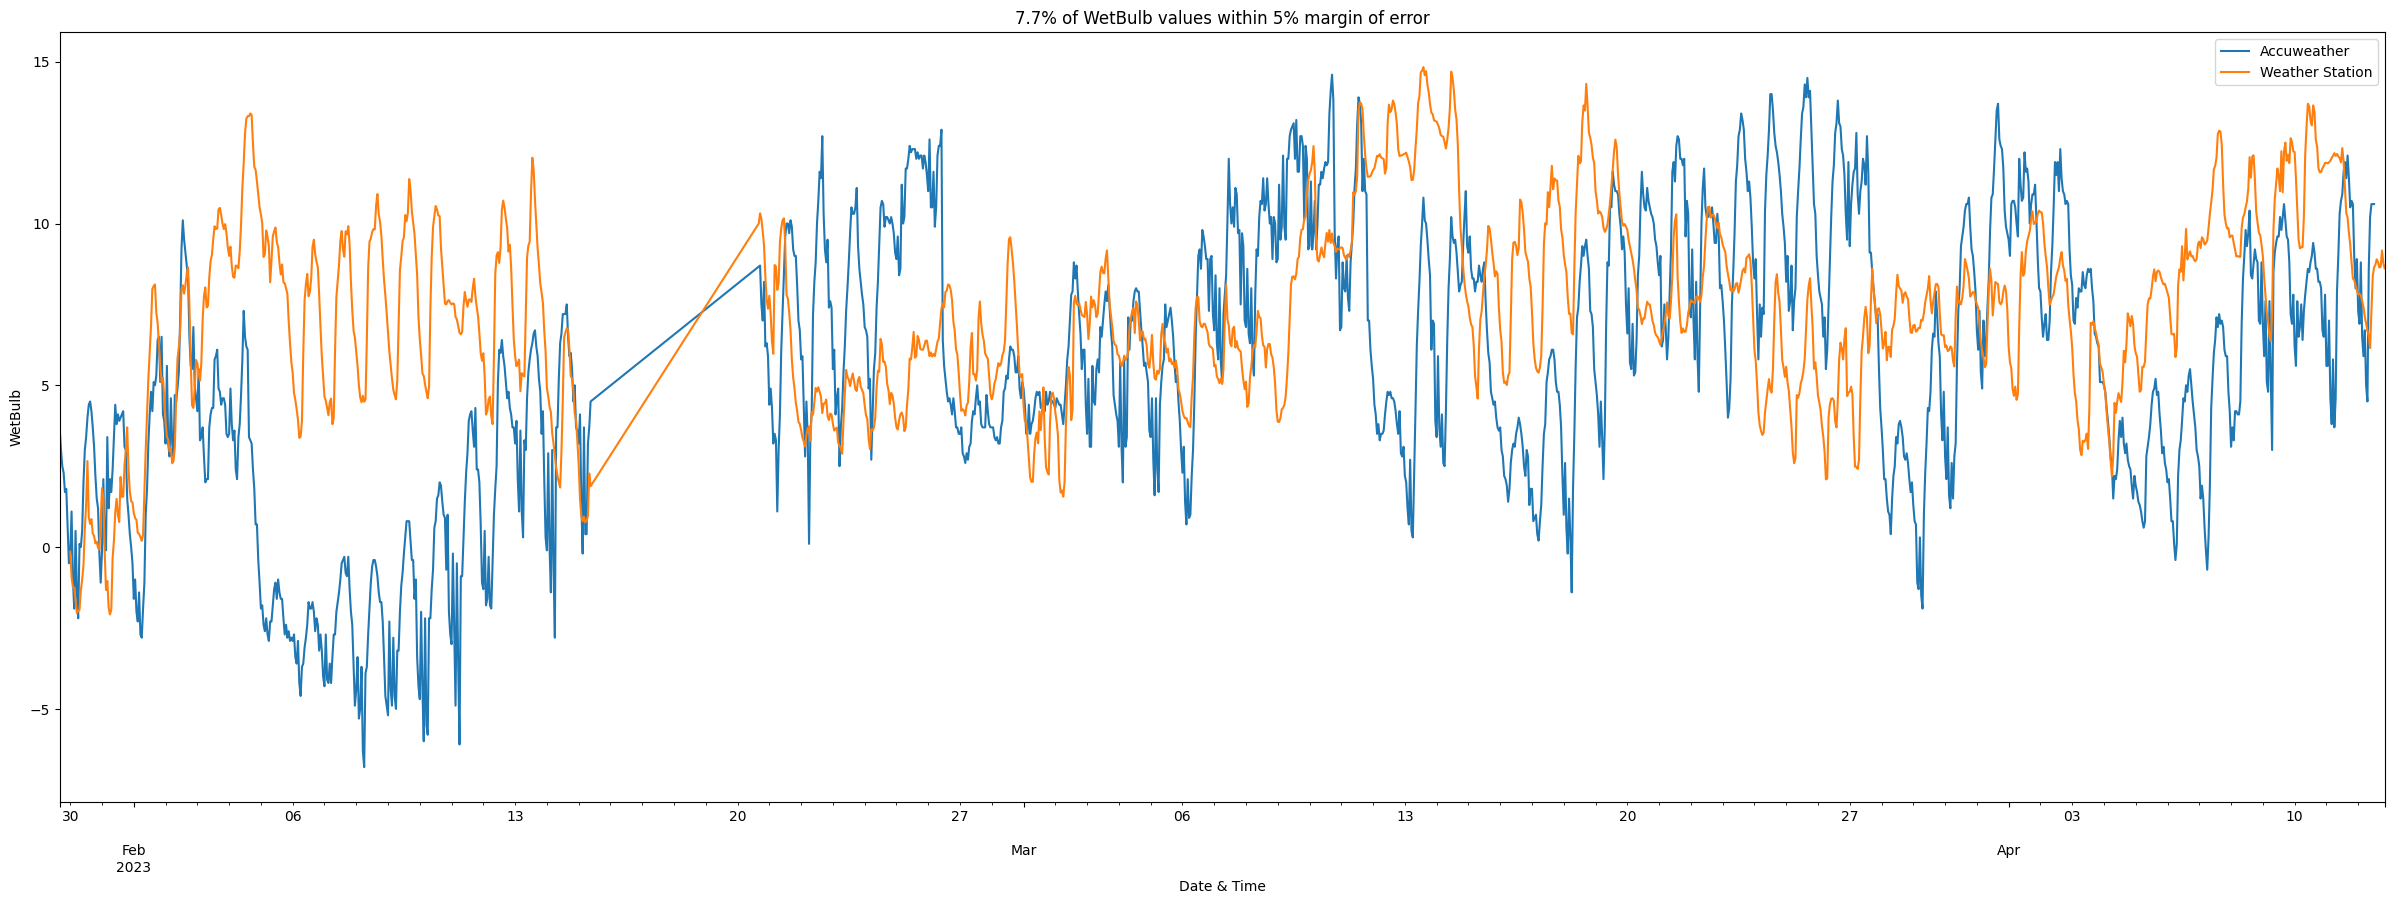

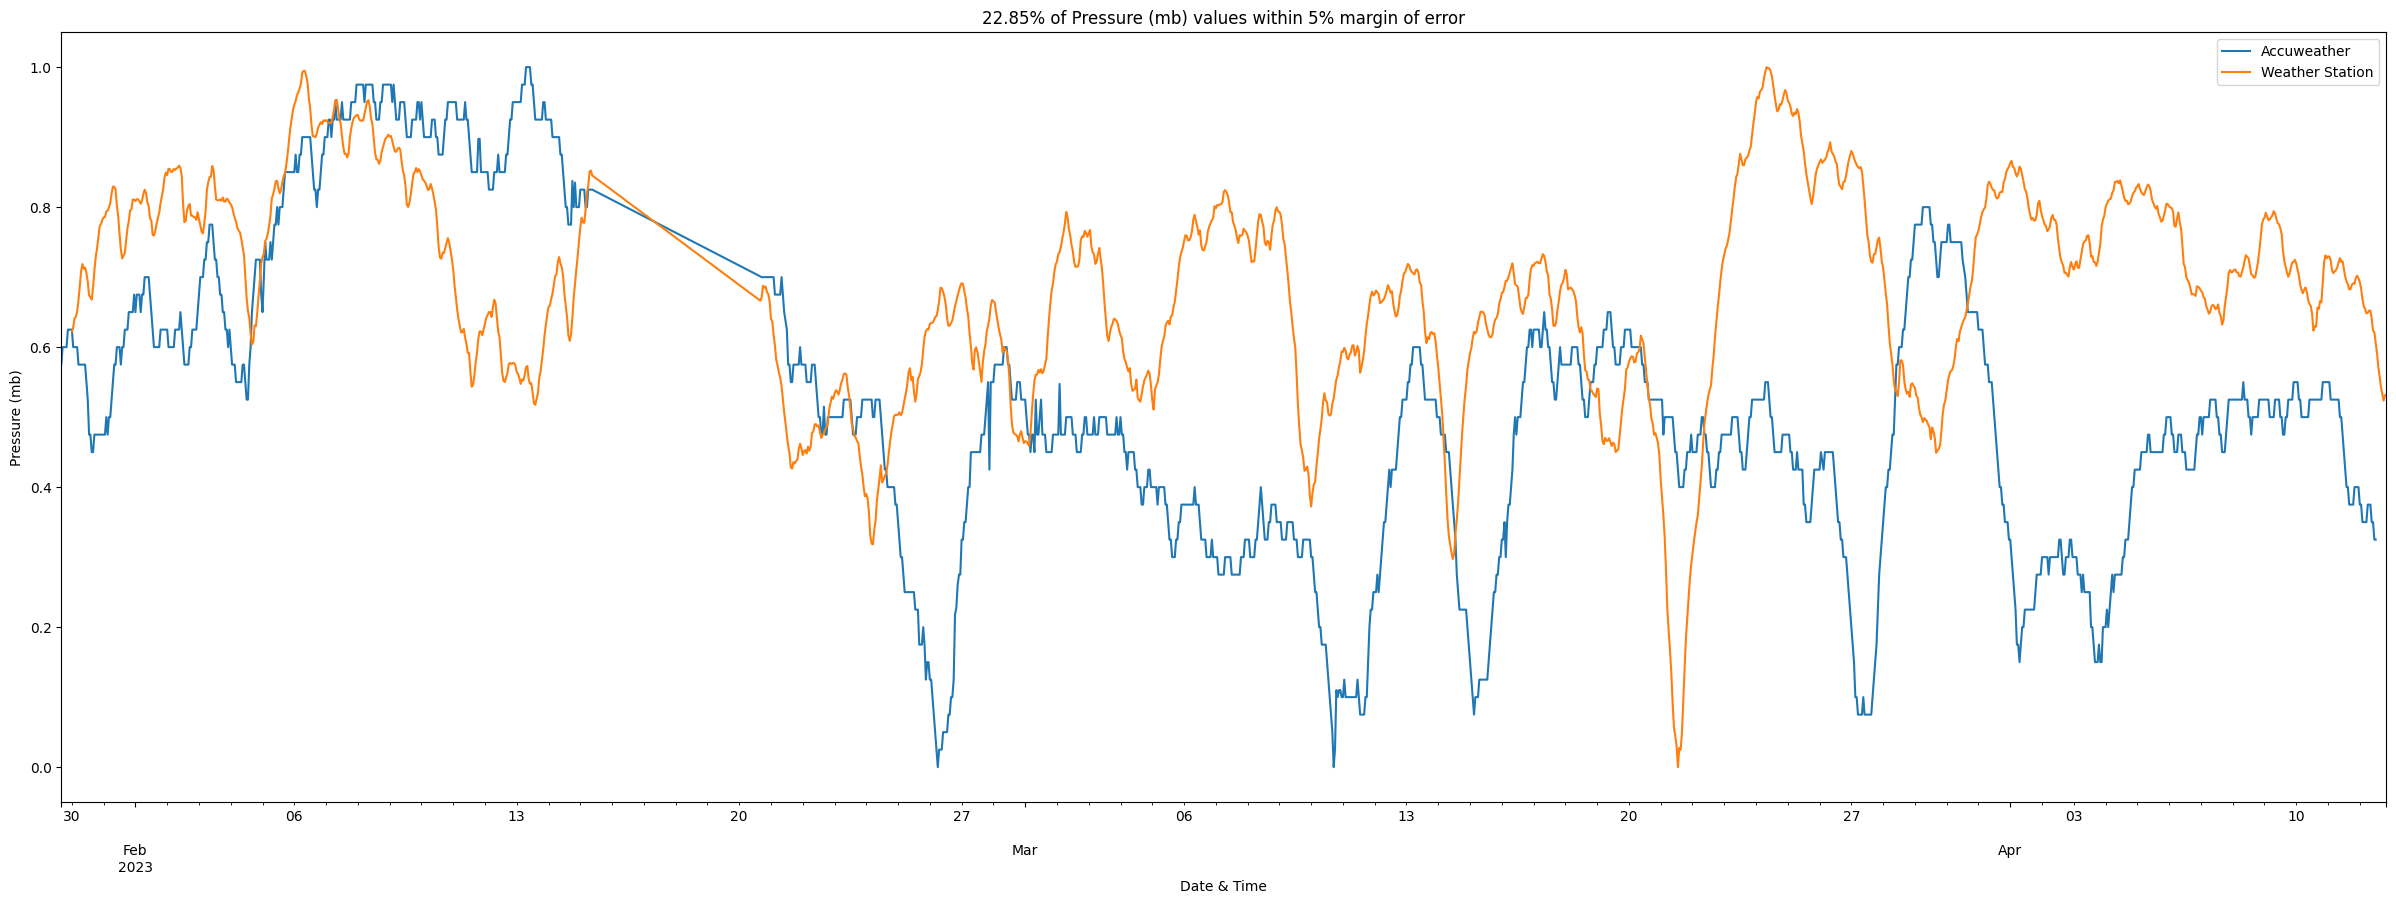

In [22]:
# calculate the percentage difference between the two data sources by feature
calculate_percent_difference_df = pd.DataFrame()
threshold_percentage_df = pd.DataFrame()

# histogram line graph
for accuweather_col, accuweather_meteo_col in comp_dict.items():

  # Calculate the percentage difference between the two data sources by feature
  difference_col = f"{accuweather_col} Percent Difference"
  threshold_column = f"{accuweather_col} Within Threshold"

  calculate_percent_difference_df[difference_col] = abs(accuweather_comp_hourly[accuweather_col].sub(accuweather_meteo_comp_hourly[accuweather_meteo_col]) / accuweather_comp_hourly[accuweather_col]) * 100

  calculate_percent_difference_df[difference_col] = calculate_percent_difference_df[difference_col].round(2)
  calculate_percent_difference_df.dropna(inplace=True)

  calculate_percent_difference_df[threshold_column] = calculate_percent_difference_df[difference_col] <= 5
  percentage_within_threshold = (calculate_percent_difference_df[threshold_column].mean() * 100).round(2)

  threshold_percentage_df[threshold_column] = [percentage_within_threshold]

  # Drawing the plot
  plt.figure(figsize=(30,10))

  accuweather_comp_hourly[accuweather_col].plot(label='Accuweather')
  accuweather_meteo_comp_hourly[accuweather_meteo_col].plot(label='Weather Station')

  plt.xlabel('Date & Time')
  plt.ylabel(accuweather_col)
  plt.title(f"{threshold_percentage_df[threshold_column].values[0]}% of {accuweather_col} values within 5% margin of error")
  plt.legend()

  # plt.savefig(f"../../reports/figures/accuweather_weather_station_comparison_{accuweather_col.replace('/', '')}.png")

  plt.show()
